<a href="https://colab.research.google.com/github/KAlikhanov/food-sales-prediction-proj/blob/main/Food_Sales_Prediction_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

In [3]:
import pandas as pd
import numpy as np
filename = '/content/drive/MyDrive/Colab Notebooks/Sales Prediction Project/sales_predictions.csv'

In [4]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# 1. This will give me the # of rows and columns. (rows, columns)
df.shape

(8523, 12)

In [6]:
# 2. This will give me the datasets for each column.
# Here I check my head() to make sure the Dtypes line up with what I am seeing, 
# and they all do. In this case we have object, float, and int columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# I wanted to check if there was an extra index column, 
# so I see how many unique values are in each column.
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
# I notice that the amount of null values present are only in two columns and in
# both cases it is a lot of values. Because of this I do a quick calculation to 
# see what 5% of my dataset is. Because the amount of null values is way over
# 5% I want to deal with them in a way that isn't just deleting the rows that 
# contain the null values.
len(df)*0.05

426.15000000000003

In [9]:
# 3. I check for duplicates. I will do this again after I have completed 
# cleaning the data.
df.duplicated().sum()

0

In [10]:
# 4. I see just how many null values are in the dataset for each column.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# I look at the first column with missing values.
# Since there are a lot of different unique values, 
# I rule out replacing them with a mode.
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [12]:
# I look at the mean value for the column.
mean_weight = df['Item_Weight'].mean()
mean_weight

12.857645184135976

In [13]:
# 5. At this point I decided to replace the missing values with the mean value
# of the column. There are a couple of reasons that I did this. Originally 
# I deleted this column outright as the amount of missing values was a lot and I
# was dubious about the data's necessity. After going through the assignment 
# I realized a couple of key points that made me reverse my decision. 
# For one, at this point I do not have a clear idea about what exactly I want 
# to include in my sales prediction and item weight could turn out to be
# an important factor. Two, because this dataset is numerical it is easy to 
# eliminate the limited options I have available to me. Only one really makes 
# sense to me at least. For me it is easiest to understand the average over 
# the mode and median. As in my opinion mode and median require a more total 
# understanding of the column's values. I would say that in the future it would
# be prudent to look over this again; either the information is unimportant and 
# can be deleted or it is important and a closer look at a later date
# when I have more knowledge under my belt would be helpful.
df['Item_Weight'].fillna(mean_weight,inplace=True)
df['Item_Weight'].value_counts()

12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64

In [14]:
# With the null values in Item_Weight taken care of, I begin looking at the
# Outlet_Size column's information.
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
# I look at the average item sale value for the different sized outlets.
# I notice that there is a discrepancy between the three sizes. The gap makes me
# think that Outlet_Size may have a big enough impact on item sales to be 
# noticable, but the gap is not so big that the discrepancies look random.
df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [16]:
# I realize I can try to look at this information for item weights but this is 
# notably less useful than when I used it on outlet size because of the number 
# of unique values. 
df.groupby(['Item_Weight'])['Item_Outlet_Sales'].mean()

Item_Weight
4.555     1761.706800
4.590     1267.683200
4.610     1993.595429
4.615     4078.025000
4.635     2184.489800
             ...     
21.000    1194.778100
21.100    1851.472306
21.200    2763.735800
21.250    2199.192883
21.350    3391.490086
Name: Item_Outlet_Sales, Length: 416, dtype: float64

In [17]:
# I look at the ratio between the different values in outlet size.
df['Outlet_Size'].value_counts(normalize=True, dropna=False)

Medium    0.327702
NaN       0.282764
Small     0.280183
High      0.109351
Name: Outlet_Size, dtype: float64

In [18]:
# This is without the null values. I notice the big difference when they are 
# included vs excluded. Null values are the second largest group in this 
# dataset which is worrying, as outlet size definitely seems like an important 
# factor.
df['Outlet_Size'].value_counts(normalize=True)

Medium    0.456895
Small     0.390643
High      0.152462
Name: Outlet_Size, dtype: float64

In [19]:
# I look at the average amount of sales of the rows that contain a null value.
df.loc[df['Outlet_Size'].isnull(),'Item_Outlet_Sales'].mean()

1822.6269474688797

In [20]:
# And the average of those w/o a null value.
df.loc[~df['Outlet_Size'].isnull(),'Item_Outlet_Sales'].mean()

2322.6884454441356

In [21]:
# Further analysis on the above statistics could be done to get a educated guess
# on the outlet sizes, for example the null averages are lower than the non-null 
# ones maybe there are more small outlets with null values.

In [22]:
# 5. Because this is categorical data it is hard for me to make a decision on 
# what to put in the dataset, in this case I decided to replace the missing 
# values with the string 'Missing'. It didn't make sense to replace the missing 
# values with the mode ('Medium') or do something different. Because the Dtype 
# of this column is already object I don't think I am really going to be 
# hindering myself in the future. An idea that I had was to replace the missing 
# values with a ratio of the percentages that the outlet sizes show up in the 
# data. For example Medium shows up ~45% of the time, so I would turn ~45% of 
# the missing values into Medium. ~39% Small and ~15% High. So that the ratio 
# between the different categories would remain the same. But I don't know how
# to implement that yet and I am unsure what it would look like data wise so I 
# would have to do testing.
df['Outlet_Size'].fillna('Missing',inplace=True)
df['Outlet_Size'].value_counts(dropna=False)

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [23]:
# 3. Just checking again after replacing all the missing values that there are 
# no duplicates.
df.duplicated().sum()

0

In [24]:
# 7. Mending inconsistencies in the Item_Fat_Content data.
df['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [25]:
# 7. Replacing inconsistencies with the standardized value.
df['Item_Fat_Content'].replace(to_replace='LF',value='Low Fat',inplace=True)
df['Item_Fat_Content'].replace(to_replace='reg',value='Regular',inplace=True)
df['Item_Fat_Content'].replace(to_replace='low fat',value='Low Fat',inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [26]:
# 8. The next cells until the end will be answering question 8.
# Item_Visibility info
display(df.columns[3])
display('Minimum: ' + str(df['Item_Visibility'].min()), 
        'Maximum: ' + str(df['Item_Visibility'].max()), 
        'Mean: ' + str(df['Item_Visibility'].mean()))

'Item_Visibility'

'Minimum: 0.0'

'Maximum: 0.328390948'

'Mean: 0.06613202877895108'

In [27]:
# Item_MRP info
display(df.columns[5])
display('Minimum: ' + str(df['Item_MRP'].min()), 
        'Maximum: ' + str(df['Item_MRP'].max()), 
        'Mean: ' + str(df['Item_MRP'].mean()))

'Item_MRP'

'Minimum: 31.29'

'Maximum: 266.8884'

'Mean: 140.9927819781767'

In [28]:
# Outlet_Establishment_Year info
display(df.columns[7])
display('Minimum: ' + str(df['Outlet_Establishment_Year'].min()), 
        'Maximum: ' + str(df['Outlet_Establishment_Year'].max()), 
        'Mean: ' + str(df['Outlet_Establishment_Year'].mean()))

'Outlet_Establishment_Year'

'Minimum: 1985'

'Maximum: 2009'

'Mean: 1997.8318667135984'

In [29]:
# Item_Outlet_Sales info
display(df.columns[11])
display('Minimum: ' + str(df['Item_Outlet_Sales'].min()), 
        'Maximum: ' + str(df['Item_Outlet_Sales'].max()), 
        'Mean: ' + str(df['Item_Outlet_Sales'].mean()))

'Item_Outlet_Sales'

'Minimum: 33.29'

'Maximum: 13086.9648'

'Mean: 2181.288913575032'

# Data Visualization

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]), <a list of 10 Text major ticklabel objects>)

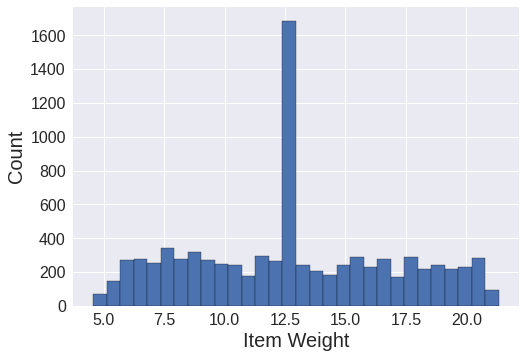

In [64]:
plt.style.use('seaborn')
df['Item_Weight'].hist(bins=30,edgecolor='Black');
plt.xlabel('Item Weight', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text major ticklabel objects>)

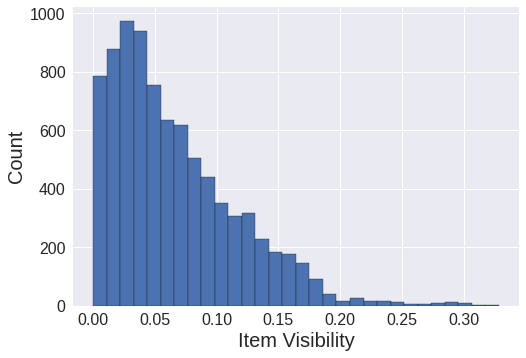

In [65]:
df['Item_Visibility'].hist(bins=30,edgecolor='Black');
plt.xlabel('Item Visibility', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

(array([  0., 100., 200., 300., 400., 500.]),
 <a list of 6 Text major ticklabel objects>)

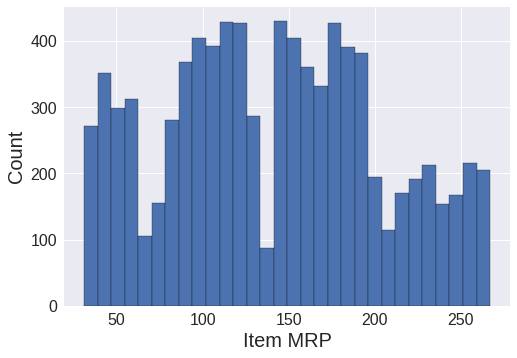

In [66]:
df['Item_MRP'].hist(bins=30,edgecolor='Black');
plt.xlabel('Item MRP', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text major ticklabel objects>)

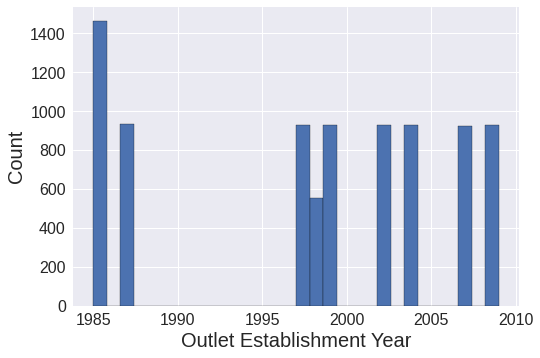

In [67]:
df['Outlet_Establishment_Year'].hist(bins=30,edgecolor='Black');
plt.xlabel('Outlet Establishment Year', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text major ticklabel objects>)

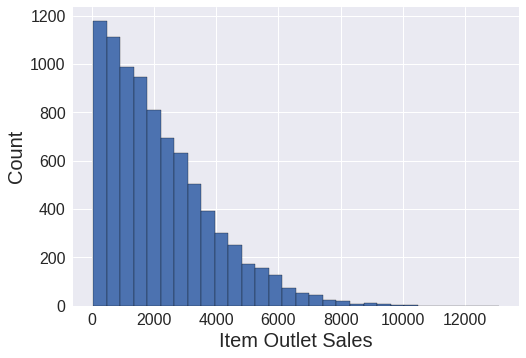

In [68]:
df['Item_Outlet_Sales'].hist(bins=30,edgecolor='Black');
plt.xlabel('Item Outlet Sales', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

(array([ 2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 <a list of 9 Text major ticklabel objects>)

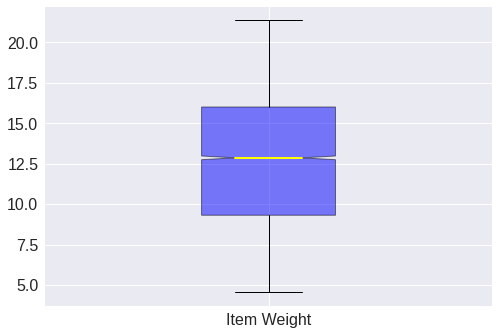

In [107]:
plt.boxplot(df['Item_Weight'],  
            labels = ['Item Weight'], 
            widths = 0.3,
            notch = True,
            patch_artist = True,
            medianprops = dict(linewidth = 2, color = 'yellow'),
            boxprops = dict(facecolor='blue', alpha = 0.5));
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35]),
 <a list of 9 Text major ticklabel objects>)

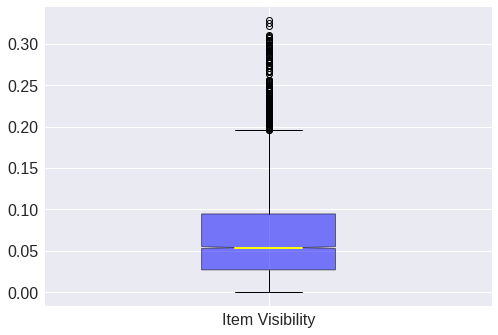

In [108]:
plt.boxplot(df['Item_Visibility'],  
            labels = ['Item Visibility'], 
            widths = 0.3,
            notch = True,
            patch_artist = True,
            medianprops = dict(linewidth = 2, color = 'yellow'),
            boxprops = dict(facecolor='blue', alpha = 0.5));
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

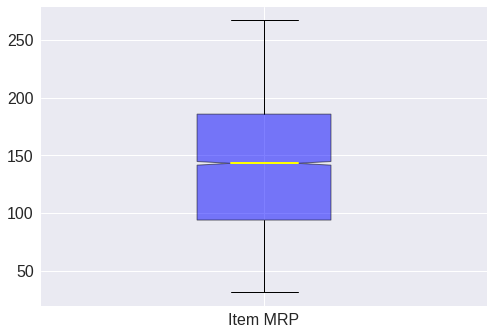

In [109]:
plt.boxplot(df['Item_MRP'],  
            labels = ['Item MRP'], 
            widths = 0.3,
            notch = True,
            patch_artist = True,
            medianprops = dict(linewidth = 2, color = 'yellow'),
            boxprops = dict(facecolor='blue', alpha = 0.5));
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

(array([1980., 1985., 1990., 1995., 2000., 2005., 2010., 2015.]),
 <a list of 8 Text major ticklabel objects>)

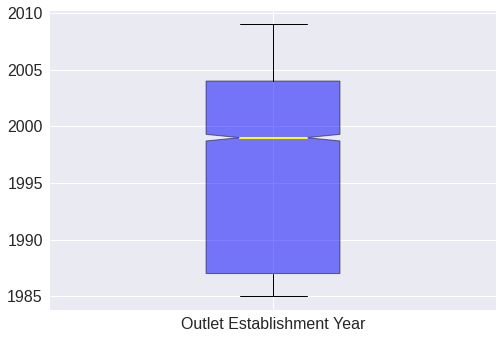

In [110]:
plt.boxplot(df['Outlet_Establishment_Year'],  
            labels = ['Outlet Establishment Year'], 
            widths = 0.3,
            notch = True,
            patch_artist = True,
            medianprops = dict(linewidth = 2, color = 'yellow'),
            boxprops = dict(facecolor='blue', alpha = 0.5));
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000.]), <a list of 9 Text major ticklabel objects>)

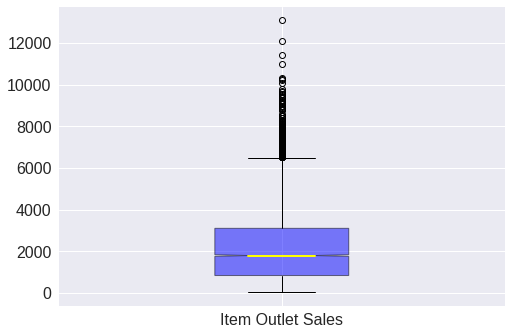

In [111]:
plt.boxplot(df['Item_Outlet_Sales'],  
            labels = ['Item Outlet Sales'], 
            widths = 0.3,
            notch = True,
            patch_artist = True,
            medianprops = dict(linewidth = 2, color = 'yellow'),
            boxprops = dict(facecolor='blue', alpha = 0.5));
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

In [117]:
correlations = df.corr()

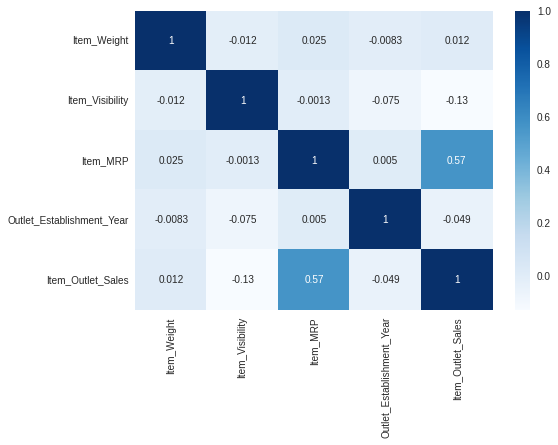

In [115]:
sns.heatmap(correlations, cmap='Blues', annot = True)